<H1> AUTOMOBILE </H1>

<h2> Import Libraries </h2>

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr

<h4> replacing and filling columns names </h4>

In [156]:
am=pd.read_csv("file:///C:/Users/Dell/Downloads/imports-85.data",names=['sym','normloss','make','fuel_type','aspiration','no_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','no_cylinders','engine_size','fuel systems','bore','stroke','compression_ratio','horpower','peak_rpm','city_mpg','highway_mpg','price'],na_values='?')

In [157]:
am.head(5)

,sym,normloss,make,fuel_type,aspiration,no_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel systems,bore,stroke,compression_ratio,horpower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [158]:
am.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sym                205 non-null    int64  
 1   normloss           164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   no_doors           203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  no_cylinders       205 non-null    object 
 16  engine_size        205 non

In [159]:
am.isnull().sum()

sym                   0
normloss             41
make                  0
fuel_type             0
aspiration            0
no_doors              2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
no_cylinders          0
engine_size           0
fuel systems          0
bore                  4
stroke                4
compression_ratio     0
horpower              2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

filling null values by using mean values if conti else mode


In [160]:
am.normloss.fillna(am.normloss.mean(),inplace = True)

In [161]:
am.no_doors.fillna(am.no_doors.mode().max(),inplace = True)

In [162]:
am.bore.fillna(am.bore.mean(),inplace = True)

In [163]:
am.stroke.fillna(am.stroke.mean(),inplace = True)

In [164]:
am.horpower.fillna(am.horpower.mean(),inplace = True)

In [165]:
am.peak_rpm.fillna(am.peak_rpm.mean(),inplace = True)

In [166]:
am.price.fillna(am.price.mean(),inplace = True)

checking null values after filling

In [167]:
am.isnull().sum()

sym                  0
normloss             0
make                 0
fuel_type            0
aspiration           0
no_doors             0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
no_cylinders         0
engine_size          0
fuel systems         0
bore                 0
stroke               0
compression_ratio    0
horpower             0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

<h2> column 1 </h2>

In [168]:
am.sym.describe()

count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: sym, dtype: float64

In [169]:
am.sym.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

<AxesSubplot:xlabel='sym', ylabel='count'>

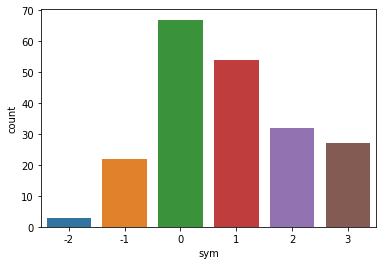

In [170]:
sns.countplot(x ='sym',data=am)

<h3> column 2 </h3>

In [171]:
am.normloss.describe()

count    205.000000
mean     122.000000
std       31.681008
min       65.000000
25%      101.000000
50%      122.000000
75%      137.000000
max      256.000000
Name: normloss, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x235c0f70e50>,
 'caps': [<matplotlib.lines.Line2D at 0x235c0f7e5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x235c0f70ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x235c0f7ecd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x235c0f8a040>],
 'means': []}

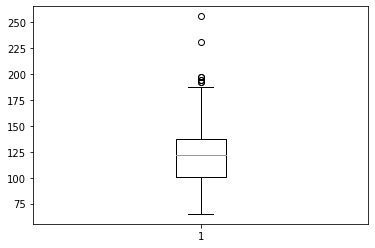

In [172]:
plt.boxplot(am.normloss)

In [173]:
q3 = am.normloss.quantile(0.75)
q1 = am.normloss.quantile(0.25)
iqr = q3 - q1
iqr

36.0

In [174]:
ue = q3+1.5*(iqr)
print(ue)

191.0


In [175]:
le = q1-1.5*(iqr)
print(le)

47.0


<h2> column 3 </h2>

In [176]:
am.make.describe()

count        205
unique        22
top       toyota
freq          32
Name: make, dtype: object

<AxesSubplot:xlabel='make', ylabel='count'>

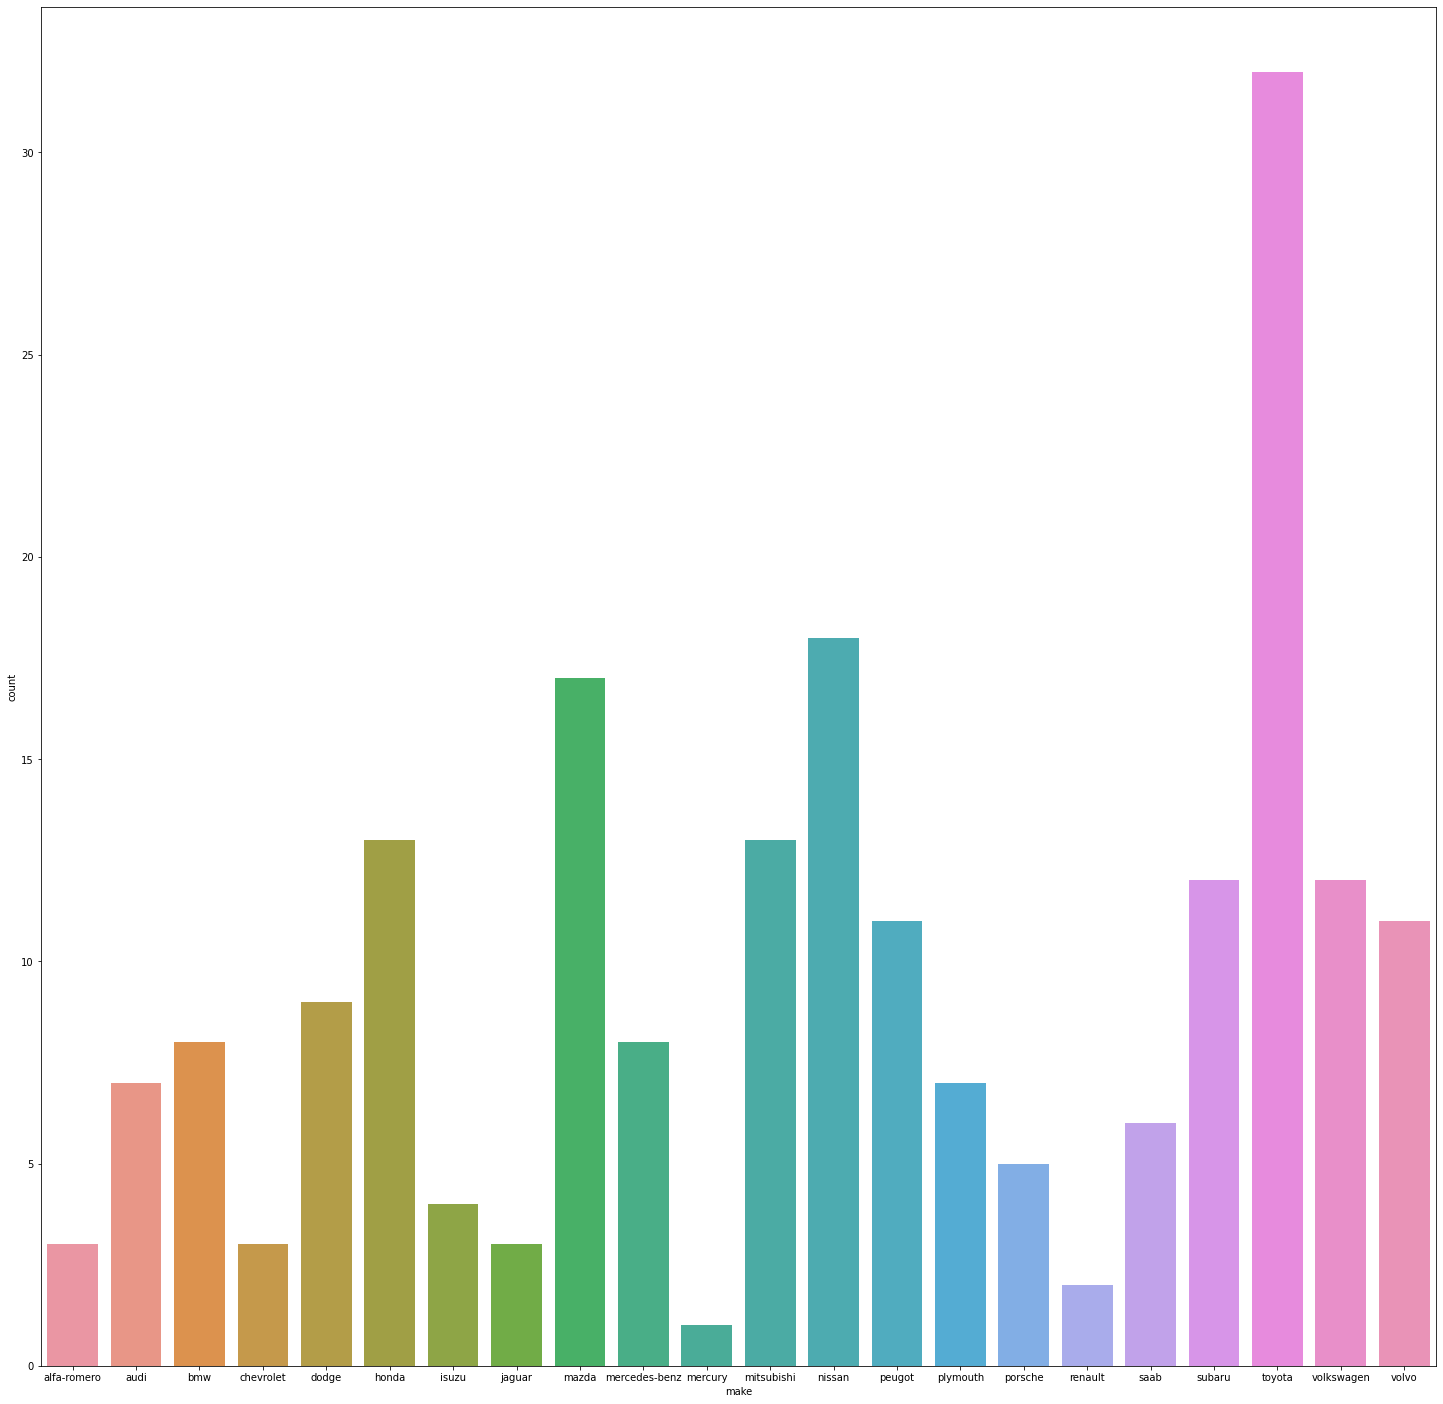

In [177]:
plt.figure(figsize=(25,25))
sns.countplot(x='make',data=am)

<h2> column 4 </h2>

In [178]:
am.fuel_type.isnull().sum()

0

In [179]:
am.fuel_type.describe()

count     205
unique      2
top       gas
freq      185
Name: fuel_type, dtype: object

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

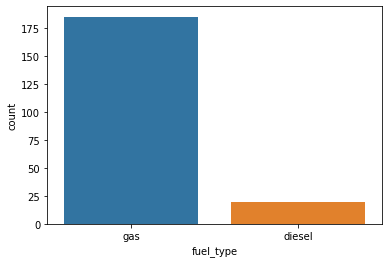

In [180]:
sns.countplot(x = 'fuel_type',data = am)

<h2> column 5 </h2>

In [181]:
am.aspiration.describe()

count     205
unique      2
top       std
freq      168
Name: aspiration, dtype: object

In [182]:
am.aspiration.isnull().sum()

0

<AxesSubplot:xlabel='aspiration', ylabel='count'>

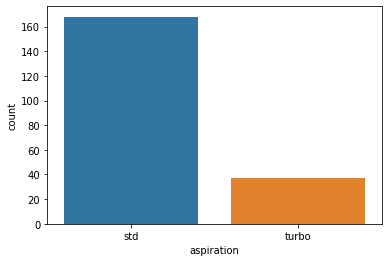

In [183]:
sns.countplot(x='aspiration',data=am)

<h2> column 6 </h2>

In [184]:
am.no_doors.describe()

count      205
unique       2
top       four
freq       116
Name: no_doors, dtype: object

In [185]:
am.no_doors.isnull().sum()

0

<AxesSubplot:xlabel='no_doors', ylabel='count'>

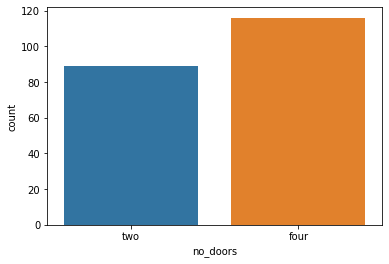

In [186]:
sns.countplot(x='no_doors',data=am)

<h2> column 7 </h2>

In [187]:
am.body_style.describe()

count       205
unique        5
top       sedan
freq         96
Name: body_style, dtype: object

In [188]:
am.body_style.isnull().sum()

0

<AxesSubplot:xlabel='body_style', ylabel='count'>

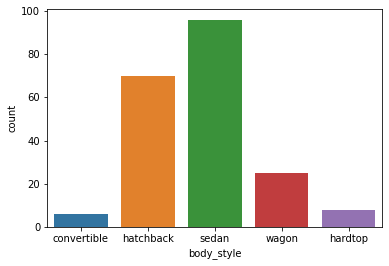

In [189]:
sns.countplot(x='body_style',data = am)

<h2> column 8 </h2>

In [190]:
am.drive_wheels.describe()

count     205
unique      3
top       fwd
freq      120
Name: drive_wheels, dtype: object

<AxesSubplot:xlabel='drive_wheels', ylabel='count'>

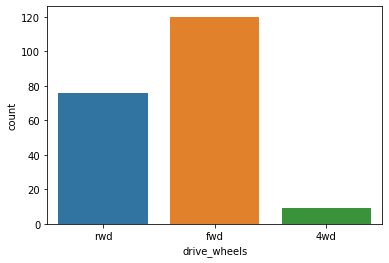

In [191]:
sns.countplot(x='drive_wheels',data = am)

<h2> column 9 </h2>

In [192]:
am.engine_location.describe()

count       205
unique        2
top       front
freq        202
Name: engine_location, dtype: object

<AxesSubplot:xlabel='engine_location', ylabel='count'>

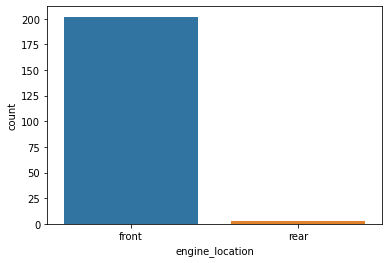

In [193]:
sns.countplot(x='engine_location',data=am)

<h2> column 10 </h2>

In [194]:
am.wheel_base.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x235c12afd60>,
 'caps': [<matplotlib.lines.Line2D at 0x235c12be4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x235c12afa90>],
 'medians': [<matplotlib.lines.Line2D at 0x235c12bebe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x235c12bef70>],
 'means': []}

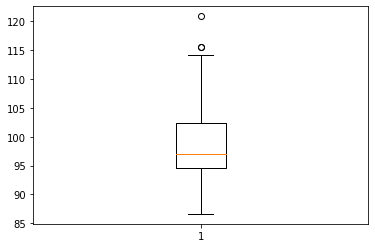

In [195]:
plt.boxplot(am.wheel_base)

<h2> column 11 </h2>

In [196]:
am.length.describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: length, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x235c1326580>,
 'caps': [<matplotlib.lines.Line2D at 0x235c1326ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x235c13261f0>],
 'medians': [<matplotlib.lines.Line2D at 0x235c1333400>],
 'fliers': [<matplotlib.lines.Line2D at 0x235c1333790>],
 'means': []}

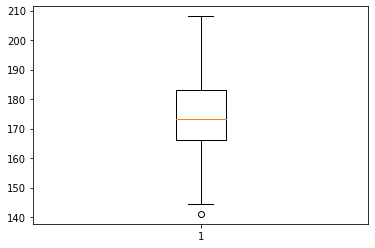

In [197]:
plt.boxplot(am.length)

In [198]:
am.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sym                205 non-null    int64  
 1   normloss           205 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   no_doors           205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  no_cylinders       205 non-null    object 
 16  engine_size        205 non

{'whiskers': [<matplotlib.lines.Line2D at 0x235c13918b0>,
 'caps': [<matplotlib.lines.Line2D at 0x235c1391fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x235c1391520>],
 'medians': [<matplotlib.lines.Line2D at 0x235c139b730>],
 'fliers': [<matplotlib.lines.Line2D at 0x235c139bac0>],
 'means': []}

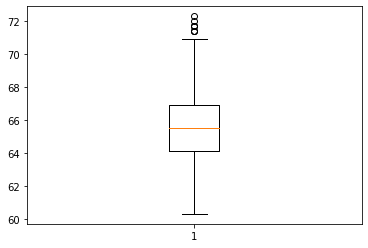

In [199]:
plt.boxplot(am.width)

{'whiskers': [<matplotlib.lines.Line2D at 0x235c13fc790>,
 'caps': [<matplotlib.lines.Line2D at 0x235c13fceb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x235c13fc400>],
 'medians': [<matplotlib.lines.Line2D at 0x235c1407610>],
 'fliers': [<matplotlib.lines.Line2D at 0x235c14079a0>],
 'means': []}

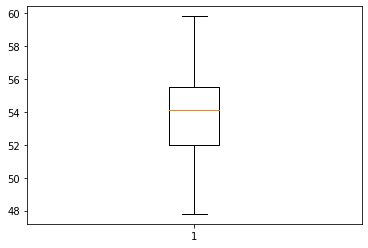

In [200]:
plt.boxplot(am.height)

{'whiskers': [<matplotlib.lines.Line2D at 0x235c14636a0>,
 'caps': [<matplotlib.lines.Line2D at 0x235c1463dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x235c1463370>],
 'medians': [<matplotlib.lines.Line2D at 0x235c1470520>],
 'fliers': [<matplotlib.lines.Line2D at 0x235c14708b0>],
 'means': []}

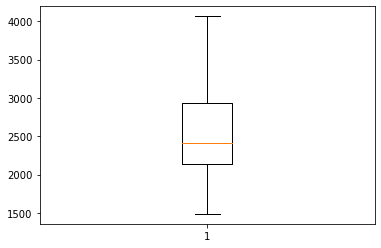

In [201]:
plt.boxplot(am.curb_weight)

<AxesSubplot:xlabel='engine_type', ylabel='count'>

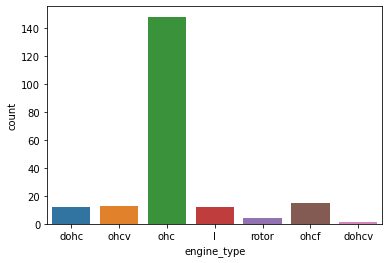

In [202]:
sns.countplot(x='engine_type',data=am)

<AxesSubplot:xlabel='no_cylinders', ylabel='count'>

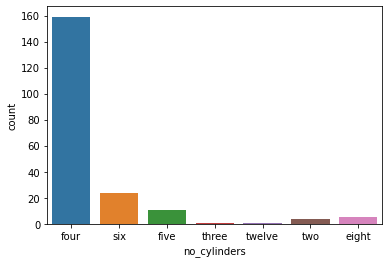

In [203]:
sns.countplot(x='no_cylinders',data = am)

{'whiskers': [<matplotlib.lines.Line2D at 0x235c15accd0>,
 'caps': [<matplotlib.lines.Line2D at 0x235c15bc310>,
 'boxes': [<matplotlib.lines.Line2D at 0x235c15ac940>],
 'medians': [<matplotlib.lines.Line2D at 0x235c15bca30>],
 'fliers': [<matplotlib.lines.Line2D at 0x235c15bcdc0>],
 'means': []}

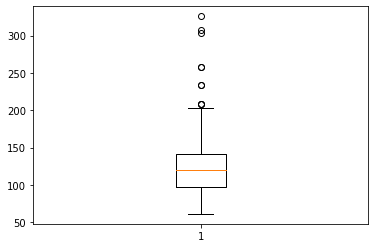

In [204]:
plt.boxplot(am.engine_size)

<AxesSubplot:xlabel='fuel systems', ylabel='count'>

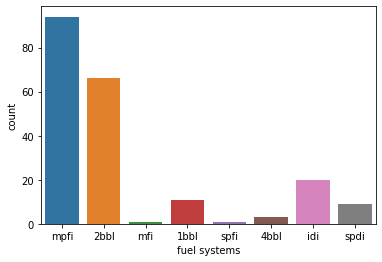

In [205]:
sns.countplot(x='fuel systems',data=am)

{'whiskers': [<matplotlib.lines.Line2D at 0x235c1685b20>,
 'caps': [<matplotlib.lines.Line2D at 0x235c1694280>,
 'boxes': [<matplotlib.lines.Line2D at 0x235c1685790>],
 'medians': [<matplotlib.lines.Line2D at 0x235c16949a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x235c1694d30>],
 'means': []}

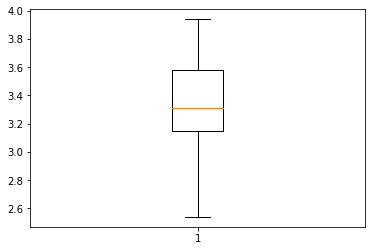

In [206]:
plt.boxplot(am.bore)

{'whiskers': [<matplotlib.lines.Line2D at 0x235c16ecf70>,
 'caps': [<matplotlib.lines.Line2D at 0x235c16fb6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x235c16ecbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x235c16fbdf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x235c17091c0>],
 'means': []}

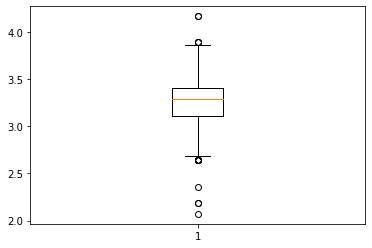

In [207]:
plt.boxplot(am.stroke)

{'whiskers': [<matplotlib.lines.Line2D at 0x235c175e370>,
 'caps': [<matplotlib.lines.Line2D at 0x235c175ea90>,
 'boxes': [<matplotlib.lines.Line2D at 0x235c174ffa0>],
 'medians': [<matplotlib.lines.Line2D at 0x235c176a1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x235c176a580>],
 'means': []}

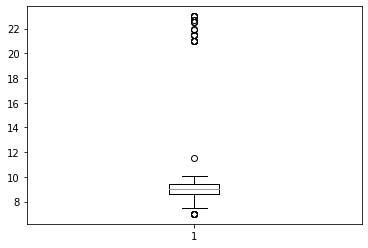

In [208]:
plt.boxplot(am.compression_ratio)

{'whiskers': [<matplotlib.lines.Line2D at 0x235c17c4970>,
 'caps': [<matplotlib.lines.Line2D at 0x235c17c4fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x235c17c46d0>],
 'medians': [<matplotlib.lines.Line2D at 0x235c17d1730>],
 'fliers': [<matplotlib.lines.Line2D at 0x235c17d1ac0>],
 'means': []}

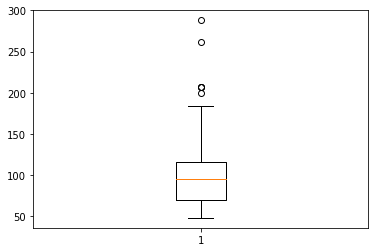

In [209]:
plt.boxplot(am.horpower)

{'whiskers': [<matplotlib.lines.Line2D at 0x235c1826af0>,
 'caps': [<matplotlib.lines.Line2D at 0x235c1835250>,
 'boxes': [<matplotlib.lines.Line2D at 0x235c1826760>],
 'medians': [<matplotlib.lines.Line2D at 0x235c1835970>],
 'fliers': [<matplotlib.lines.Line2D at 0x235c1835d00>],
 'means': []}

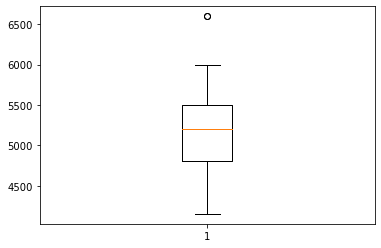

In [210]:
plt.boxplot(am.peak_rpm)

{'whiskers': [<matplotlib.lines.Line2D at 0x235c188aeb0>,
 'caps': [<matplotlib.lines.Line2D at 0x235c1898610>,
 'boxes': [<matplotlib.lines.Line2D at 0x235c188ab20>],
 'medians': [<matplotlib.lines.Line2D at 0x235c1898d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x235c18a6100>],
 'means': []}

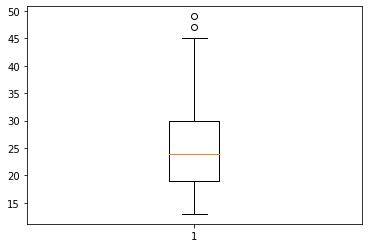

In [211]:
plt.boxplot(am.city_mpg)

{'whiskers': [<matplotlib.lines.Line2D at 0x235c19036d0>,
 'caps': [<matplotlib.lines.Line2D at 0x235c1903c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x235c1903340>],
 'medians': [<matplotlib.lines.Line2D at 0x235c190d370>],
 'fliers': [<matplotlib.lines.Line2D at 0x235c190d6a0>],
 'means': []}

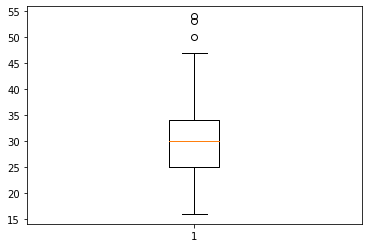

In [212]:
plt.boxplot(am.highway_mpg)

<h1> Y Variable </h1>

In [213]:
am.price.isnull().sum()

0

{'whiskers': [<matplotlib.lines.Line2D at 0x235c19723d0>,
 'caps': [<matplotlib.lines.Line2D at 0x235c1972b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x235c1972040>],
 'medians': [<matplotlib.lines.Line2D at 0x235c1972f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x235c197f310>],
 'means': []}

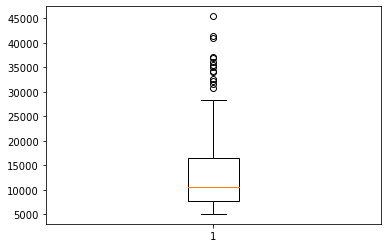

In [214]:
plt.boxplot(am.price)

<h1> analysing the columns to know what are the columns that affects price </h1>

<h5> using pearsonr and oneway anova </h5>

In [215]:
am.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sym                205 non-null    int64  
 1   normloss           205 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   no_doors           205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  no_cylinders       205 non-null    object 
 16  engine_size        205 non

In [216]:
pearsonr(am.sym,am.price)

(-0.08220143736318973, 0.24130433124264047)

In [217]:
pearsonr(am.normloss,am.price)

(0.13399873429274337, 0.05543057826318259)

In [218]:
pearsonr(am.wheel_base,am.price)

(0.5831681499789547, 4.527625545686765e-20)

In [219]:
pearsonr(am.length,am.price)

(0.6829862954386219, 1.6498873291218535e-29)

In [220]:
pearsonr(am.width,am.price)

(0.7286988175931839, 3.214520483804664e-35)

In [221]:
pearsonr(am.height,am.price)

(0.13438751871051807, 0.05471982048424776)

In [222]:
pearsonr(am.curb_weight,am.price)

(0.820824733354729, 2.8663321070270534e-51)

In [223]:
pearsonr(am.engine_size,am.price)

(0.8617522436859721, 9.669661923634776e-62)

In [224]:
pearsonr(am.bore,am.price)

(0.5323000195387407, 2.1398306512855486e-16)

In [225]:
pearsonr(am.stroke,am.price)

(0.08209529554134327, 0.24191456857746316)

In [226]:
pearsonr(am.compression_ratio,am.price)

(0.07099036277901556, 0.31178249194905244)

In [227]:
pearsonr(am.horpower,am.price)

(0.7579169537498177, 1.6076703978130332e-39)

In [228]:
pearsonr(am.peak_rpm,am.price)

(-0.10085406591169085, 0.15019246954232154)

In [229]:
pearsonr(am.city_mpg,am.price)

(-0.6674492651600004, 8.463700497727807e-28)

In [230]:
pearsonr(am.highway_mpg,am.price)

(-0.6905257341183488, 2.23246740583743e-30)

<h2> oneway anova </h2>

In [231]:
stats.f_oneway(am.price[am.fuel_type=='gas'],am.price[am.fuel_type=='diesel'])

F_onewayResult(statistic=2.4958589760681935, pvalue=0.11570297526361666)

In [232]:
stats.f_oneway(am.price[am.aspiration=='std'],am.price[am.aspiration=='turbo'])

F_onewayResult(statistic=6.587289855140993, pvalue=0.010991046478632666)

In [233]:
stats.f_oneway(am.price[am.no_doors=='four'],am.price[am.no_doors=='two'])

F_onewayResult(statistic=0.35778516571700403, pvalue=0.5504056367624801)

In [234]:
stats.f_oneway(am.price[am.drive_wheels=='fwd'],am.price[am.drive_wheels=='rwd'],am.price[am.drive_wheels=='4wd'])

F_onewayResult(statistic=67.5036668266912, pvalue=3.5392707916047903e-23)

In [235]:
stats.f_oneway(am.price[am.body_style=='convertible'],am.price[am.body_style=='hatchback'],am.price[am.body_style=='sedan'],am.price[am.body_style=='wagon'],am.price[am.body_style=='hardtop'])

F_onewayResult(statistic=9.183927252573389, pvalue=7.844575720929884e-07)

In [236]:
stats.f_oneway(am.price[am.engine_location=='front'],am.price[am.engine_location=='rear'])

F_onewayResult(statistic=24.979629190446918, pvalue=1.2486063656822578e-06)

In [237]:
stats.f_oneway(am.price[am.engine_type=='ohc'],am.price[am.engine_type=='ohcf'],am.price[am.engine_type=='ohcv'],am.price[am.engine_type=='l'],am.price[am.engine_type=='rotor']

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_6660/852087327.py, line 1)

In [238]:
am.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sym                205 non-null    int64  
 1   normloss           205 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   no_doors           205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  no_cylinders       205 non-null    object 
 16  engine_size        205 non

In [239]:
stats.f_oneway(am.price[am.no_cylinders=='four'],am.price[am.no_cylinders=='six'],am.price[am.no_cylinders=='five'],am.price[am.no_cylinders=='eight'],am.price[am.no_cylinders=='two'],am.price[am.no_cylinders=='three'],am.price[am.no_cylinders=='twelve'])


F_onewayResult(statistic=45.72705376201727, pvalue=7.149269882584999e-35)

In [240]:
stats.f_oneway(am.price[am.fuel systems=='mpfi'],am.price[am.fuel systems=='2bbl'],am.price[am.fuel systems=='idi'],am.price[am.fuel systems=='1bbl'],am.price[am.fuel systems=='spdi'],am.price[am.fuel systems=='4bbl'],am.price[am.fuel systems=='mfi'],am.price[am.fuel systems=='spfi'])


SyntaxError: invalid syntax (Temp/ipykernel_6660/37439825.py, line 1)

In [242]:
stats.f_oneway(am.price[am.fuel systems=='mpfi'],am.price[am.fuel systems=='2bbl'],am.price[am.fuel systems=='idi'],am.price[am.fuel systems=='1bbl'],am.price[am.fuel systems=='spdi'],am.price[am.fuel systems=='4bbl'],am.price[am.fuel systems=='mfi'],am.price[am.fuel systems=='spfi'])

SyntaxError: invalid syntax (Temp/ipykernel_6660/2743739252.py, line 1)

In [241]:
stats.f_oneway(am.price[am.fuel systems=='mpfi'],am.price[am.fuel systems=='2bbl'],am.price[am.fuel systems=='idi'],am.price[am.fuel systems=='1bbl'],am.price[am.fuel systems=='spdi'],am.price[am.fuel systems=='4bbl'],am.price[am.fuel systems=='mfi'],am.price[am.fuel systems=='spfi'])


SyntaxError: invalid syntax (Temp/ipykernel_6660/37439825.py, line 1)

In [ ]:
stats.f_oneway(df.price[df.fuelSystem=='mpfi'],df.price[df.fuelSystem=='2bbl'],df.price[df.fuelSystem=='idi'],df.price[df.fuelSystem=='1bbl'],df.price[df.fuel System=='spdi'],df.price[df.fuelSystem=='4bbl'],df.price[df.fuelSystem=='mfi'],df.price[df.fuelSystem=='spfi'])


SyntaxError: invalid syntax (Temp/ipykernel_6660/251192660.py, line 1)

<h2> columns that are not affecting the price </h2>

In [249]:
am.drop(['sym','normloss','make','height','no_doors','stroke','compression_ratio','peak_rpm','fuel_type'],axis=1,inplace=True)

In [250]:
am.columns

Index(['aspiration', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'curb_weight', 'engine_type',
       'no_cylinders', 'engine_size', 'fuel systems', 'bore', 'horpower',
       'city_mpg', 'highway_mpg', 'price'],
      dtype='object')